# Importing Libraries

In [1]:
#Data Structures
import pandas as pd
import numpy as np
import re
import os


#Sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score

#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Reading the datasets

In [3]:
data = pd.read_csv(r'/Users/shikhargoyal/Documents/Shikhar/Ug/Telecom Churn Case Study/ml-lab-i-c31/train.csv')
unseen = pd.read_csv(r'/Users/shikhargoyal/Documents/Shikhar/Ug/Telecom Churn Case Study/ml-lab-i-c31/test.csv')
sample = pd.read_csv(r'/Users/shikhargoyal/Documents/Shikhar/Ug/Telecom Churn Case Study/ml-lab-i-c31/sample.csv')
data_dict = pd.read_csv(r'/Users/shikhargoyal/Documents/Shikhar/Ug/Telecom Churn Case Study/ml-lab-i-c31/data_dictionary.csv')

print(data.shape)
print(unseen.shape)
print(sample.shape)
print(data_dict.shape)

(69999, 172)
(30000, 171)
(30000, 2)
(36, 2)


In [4]:
data_dict

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


In [5]:
data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [6]:
# getting the data info

data.info(verbose =True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [7]:
data.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

In [8]:
# making the column names similar to other column name

data = data.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8'})

In [9]:
# checking if the column names have been changed

data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [10]:
# Checking the null values

(100*(data.isnull().sum())/len(data.index))

id                           0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.002871
std_og_t2o_mou               1.002871
loc_ic_t2o_mou               1.002871
last_date_of_month_6         0.000000
last_date_of_month_7         0.570008
last_date_of_month_8         1.047158
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  3.954342
onnet_mou_7                  3.838626
onnet_mou_8                  5.290076
offnet_mou_6                 3.954342
offnet_mou_7                 3.838626
offnet_mou_8                 5.290076
roam_ic_mou_6                3.954342
roam_ic_mou_7                3.838626
roam_ic_mou_8                5.290076
roam_og_mou_6                3.954342
roam_og_mou_7                3.838626
roam_og_mou_8                5.290076
loc_og_t2t_mou_6             3.954342
loc_og_t2t_mou_7             3.838626
loc_og_t2t_mou_8             5.290076
loc_og_t2m_m

In [11]:
data[['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','total_rech_data_6','total_rech_data_7','total_rech_data_8']].isnull().sum()

av_rech_amt_data_6    52431
av_rech_amt_data_7    52134
av_rech_amt_data_8    51582
total_rech_data_6     52431
total_rech_data_7     52134
total_rech_data_8     51582
dtype: int64

In [12]:
# Focusing on high value customers, imputing missing values with 0

data[['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','total_rech_data_6','total_rech_data_7','total_rech_data_8']]= data[['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','total_rech_data_6','total_rech_data_7','total_rech_data_8']].fillna(0, axis=1)

In [13]:
# imputing missing values for other columns

col1 = ['max_rech_data_6','max_rech_data_7','max_rech_data_8','count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8','night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']
data[col1]=data[col1].replace(np.nan, 0)

In [14]:
# checking the columns having more than 70% missing values

# Checking the null values

col2 = ((100*(data.isnull().sum())/len(data.index)) > 70)
col2

id                          False
circle_id                   False
loc_og_t2o_mou              False
std_og_t2o_mou              False
loc_ic_t2o_mou              False
last_date_of_month_6        False
last_date_of_month_7        False
last_date_of_month_8        False
arpu_6                      False
arpu_7                      False
arpu_8                      False
onnet_mou_6                 False
onnet_mou_7                 False
onnet_mou_8                 False
offnet_mou_6                False
offnet_mou_7                False
offnet_mou_8                False
roam_ic_mou_6               False
roam_ic_mou_7               False
roam_ic_mou_8               False
roam_og_mou_6               False
roam_og_mou_7               False
roam_og_mou_8               False
loc_og_t2t_mou_6            False
loc_og_t2t_mou_7            False
loc_og_t2t_mou_8            False
loc_og_t2m_mou_6            False
loc_og_t2m_mou_7            False
loc_og_t2m_mou_8            False
loc_og_t2f_mou

In [15]:
#dropping columns having more than 70% null values

data = data.drop('date_of_last_rech_data_6', axis=1)
data = data.drop('date_of_last_rech_data_7', axis=1)
data = data.drop('date_of_last_rech_data_8', axis=1)

# Creating new columns which will help in finding high value customers

In [16]:
#sum all types of data recharge in the month

data['total_recharge_num_data_6'] = (data['count_rech_2g_6'] + data['count_rech_3g_6']).astype(int)
data['total_recharge_num_data_7'] = (data['count_rech_2g_7'] + data['count_rech_3g_7']).astype(int)
data['total_recharge_num_data_8'] = (data['count_rech_2g_8'] + data['count_rech_3g_8']).astype(int)

In [17]:
#calculating total amount spent on recharging data in different months

data['total_recharge_amt_data_6'] = data['total_recharge_num_data_6']*data['av_rech_amt_data_6']
data['total_recharge_amt_data_7'] = data['total_recharge_num_data_7']*data['av_rech_amt_data_7']
data['total_recharge_amt_data_8'] = data['total_recharge_num_data_8']*data['av_rech_amt_data_8']

In [18]:
# calculating the total amount of recharge mobile data + call

data['total_month_rech_6'] = data['total_rech_amt_6'] + data['total_recharge_amt_data_6']
data['total_month_rech_7'] = data['total_rech_amt_7'] + data['total_recharge_amt_data_7']
data['total_month_rech_8'] = data['total_rech_amt_8'] + data['total_recharge_amt_data_8']

In [19]:
# Filtering high value customers "Customers in good phase"


high_value_cust = data[data[['total_month_rech_6','total_month_rech_7']].mean(axis=1) > data[['total_month_rech_6','total_month_rech_7']].mean(axis=1).quantile(0.7)]

In [20]:
high_value_cust.shape

(20998, 178)

In [21]:
# checking null values in the high value customer dataset

(100*(high_value_cust.isnull().sum())/len(high_value_cust.index))

id                           0.000000
circle_id                    0.000000
loc_og_t2o_mou               0.795314
std_og_t2o_mou               0.795314
loc_ic_t2o_mou               0.795314
last_date_of_month_6         0.000000
last_date_of_month_7         0.071435
last_date_of_month_8         0.528622
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  1.885894
onnet_mou_7                  1.866844
onnet_mou_8                  3.909896
offnet_mou_6                 1.885894
offnet_mou_7                 1.866844
offnet_mou_8                 3.909896
roam_ic_mou_6                1.885894
roam_ic_mou_7                1.866844
roam_ic_mou_8                3.909896
roam_og_mou_6                1.885894
roam_og_mou_7                1.866844
roam_og_mou_8                3.909896
loc_og_t2t_mou_6             1.885894
loc_og_t2t_mou_7             1.866844
loc_og_t2t_mou_8             3.909896
loc_og_t2m_m

In [22]:
# tagging churned customers out of high value customers , churned customers will be those customers who havn't recharged mobile data and called in the last month 8th

col11 = ['vol_3g_mb_8', 'vol_2g_mb_8','total_ic_mou_8','total_og_mou_8']

high_value_cust['Churn_cusomters_Flag Y/N']=high_value_cust[col11].apply(lambda x: 1 if ((x['vol_3g_mb_8']==0) & (x['vol_2g_mb_8']==0.0) & (x['total_ic_mou_8']==0)  & (x['total_og_mou_8']==0)) else 0, axis=1)

In [23]:
# checking the churned customers and non churned customers number
# Out of high value customers 1118 customers have churned and 19880 customers have not churned out

high_value_cust['Churn_cusomters_Flag Y/N'].value_counts()

0    19880
1     1118
Name: Churn_cusomters_Flag Y/N, dtype: int64

Data is imbalance

In [24]:
# we can drop circle id column as it does not have any distinct values

high_value_cust['circle_id'].value_counts()

109    20998
Name: circle_id, dtype: int64

In [25]:
# dropping circle id column
    
high_value_cust = high_value_cust.drop('circle_id', axis=1)

In [26]:
# Fetched all the columns which is containing date so that we can make the format for all of those columns same

l1 = []
for i in high_value_cust.columns:
    a1= i.split("_")
    a2= 'date'
    if a2 in a1:
        l1.append(i)

l1

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8']

In [27]:
# Convert date column datatype to datetime

high_value_cust['date_of_last_rech_6'] = pd.to_datetime(high_value_cust['date_of_last_rech_6'], format='%m/%d/%Y')
high_value_cust['date_of_last_rech_7'] = pd.to_datetime(high_value_cust['date_of_last_rech_7'], format='%m/%d/%Y')
high_value_cust['date_of_last_rech_8'] = pd.to_datetime(high_value_cust['date_of_last_rech_8'], format='%m/%d/%Y')
high_value_cust['last_date_of_month_6'] = pd.to_datetime(high_value_cust['last_date_of_month_6'], format='%m/%d/%Y')
high_value_cust['last_date_of_month_7'] = pd.to_datetime(high_value_cust['last_date_of_month_7'], format='%m/%d/%Y')
high_value_cust['last_date_of_month_8'] = pd.to_datetime(high_value_cust['last_date_of_month_8'], format='%m/%d/%Y')

In [28]:
# checking the datatype if it got changed or not

high_value_cust['date_of_last_rech_6'].dtype

dtype('<M8[ns]')

In [29]:
# checking the columns statistical information

high_value_cust.describe()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn_probability,total_recharge_num_data_6,total_recharge_num_data_7,total_recharge_num_data_8,total_recharge_amt_data_6,total_recharge_amt_data_7,total_recharge_amt_data_8,total_month_rech_6,total_month_rech_7,total_month_rech_8,Churn_cusomters_Flag Y/N
count,20998.000000,20831.0,20831.0,20831.0,20998.000000,20998.000000,20998.000000,20602.000000,20606.000000,20177.000000,20602.000000,20606.000000,20177.000000,20602.000000,20606.000000,20177.000000,20602.000000,20606.000000,20177.000000,20602.000000,20606.000000,20177.000000,20602.000000,20606.000000,20177.000000,20602.000000,20606.000000,20177.000000,20602.000000,20606.000000,20177.000000,20602.000000,20606.000000,20177.000000,20602.000000,20606.000000,20177.000000,20602.000000,20606.000000,20177.000000,20602.000000,20606.000000,20177.000000,20602.0,20606.0,20177.0,20602.000000,20606.000000,20177.000000,20602.000000,20606.000000,20177.000000,20602.000000,20606.00000,20177.000000,20602.000000,20606.000000,20177.000000,20998.000000,20998.000000,20998.000000,20602.000000,20606.000000,20177.000000,20602.000000,20606.000000,20177.000000,20602.000000,20606.000000,20177.000000,20602.000000,20606.000000,20177.000000,20602.000000,20606.000000,20177.000000,20602.000000,20606.000000,20177.000000,20602.000000,20606.000000,20177.000000,20602.0,20606.0,20177.0,20602.000000,20606.000000,20177.000000,20998.000000,20998.000000,20998.000000,20602.000000,20606.000000,20177.000000,20602.000000,20606.000000,20177.000000,20602.000000,20606.000000,20177.000000,20998.000000,20998.00000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.00

In [30]:
# dropping columns which have only 0 as a value as is seen from stats

high_value_cust.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'],inplace=True,axis=1)

In [31]:
# dropping columns which have only 0 as a value as is seen from stats

high_value_cust.drop(['std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'],inplace=True,axis=1)

In [32]:
# checking null values in the high value customer dataset
l4 = []
for i in high_value_cust.columns:
    if (100*(high_value_cust[i].isnull().sum())/len(high_value_cust.index)) > 3:
        l4.append(i)
l4   

['onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'og_others_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8']

In [33]:
# imputing the missing values from l4 with 0

high_value_cust[l4]=high_value_cust[l4].replace(np.nan, 0)

In [34]:
#checking the null values

(100*(high_value_cust.isnull().sum())/len(high_value_cust.index)) 

id                           0.000000
last_date_of_month_6         0.000000
last_date_of_month_7         0.071435
last_date_of_month_8         0.528622
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  1.885894
onnet_mou_7                  1.866844
onnet_mou_8                  0.000000
offnet_mou_6                 1.885894
offnet_mou_7                 1.866844
offnet_mou_8                 0.000000
roam_ic_mou_6                1.885894
roam_ic_mou_7                1.866844
roam_ic_mou_8                0.000000
roam_og_mou_6                1.885894
roam_og_mou_7                1.866844
roam_og_mou_8                0.000000
loc_og_t2t_mou_6             1.885894
loc_og_t2t_mou_7             1.866844
loc_og_t2t_mou_8             0.000000
loc_og_t2m_mou_6             1.885894
loc_og_t2m_mou_7             1.866844
loc_og_t2m_mou_8             0.000000
loc_og_t2f_mou_6             1.885894
loc_og_t2f_m

In [35]:
l11 = []
for i in high_value_cust.columns:
    a1= i.split("_")
    a2= 'date'
    if a2 not in a1:
        l11.append(i)

l11

['id',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'l

In [36]:
# imputing the missing values from l4 with 0

high_value_cust[l11]=high_value_cust[l11].replace(np.nan, 0)

# EDA

<AxesSubplot:xlabel='roam_og_mou_8'>

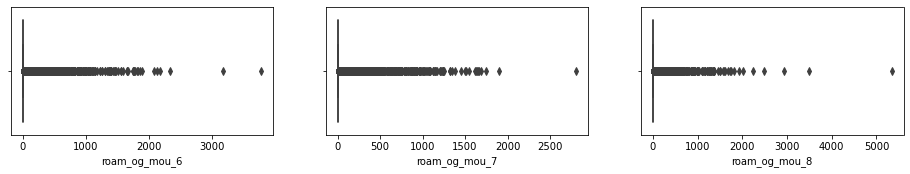

In [37]:
plt.figure(figsize=(16,8))

plt.subplot(3, 3, 1)
#subplot 1
sns.boxplot(high_value_cust['roam_og_mou_6'])

plt.subplot(3, 3, 2)
#subplot 2
sns.boxplot(high_value_cust['roam_og_mou_7'])

plt.subplot(3, 3, 3)
#subplot 3
sns.boxplot(high_value_cust['roam_og_mou_8'])

### Distribution of roaming is decreasing over the months and it shows that customer is not happy with the service and would have shifted to other operator

<AxesSubplot:xlabel='total_og_mou_8'>

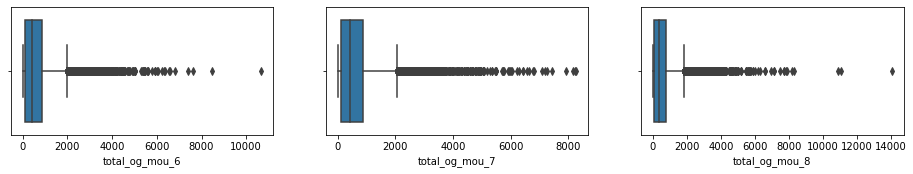

In [38]:
plt.figure(figsize=(16,8))

plt.subplot(3, 3, 1)
#subplot 1
sns.boxplot(high_value_cust['total_og_mou_6'])

plt.subplot(3, 3, 2)
#subplot 2
sns.boxplot(high_value_cust['total_og_mou_7'])

plt.subplot(3, 3, 3)
#subplot 3
sns.boxplot(high_value_cust['total_og_mou_8'])

### Distribution of total outgoing roaming is decreasing over the months and it shows that customer is not happy with the service and would have shifted to other operator

<AxesSubplot:xlabel='total_ic_mou_8'>

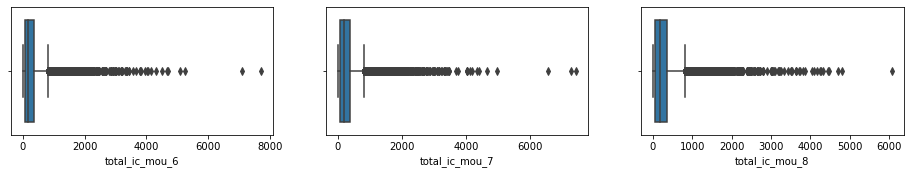

In [39]:
plt.figure(figsize=(16,8))

plt.subplot(3, 3, 1)
#subplot 1
sns.boxplot(high_value_cust['total_ic_mou_6'])

plt.subplot(3, 3, 2)
#subplot 2
sns.boxplot(high_value_cust['total_ic_mou_7'])

plt.subplot(3, 3, 3)
#subplot 3
sns.boxplot(high_value_cust['total_ic_mou_8'])

### Distribution of total incoming minutes of usage has reduced for august

<AxesSubplot:xlabel='total_rech_data_8'>

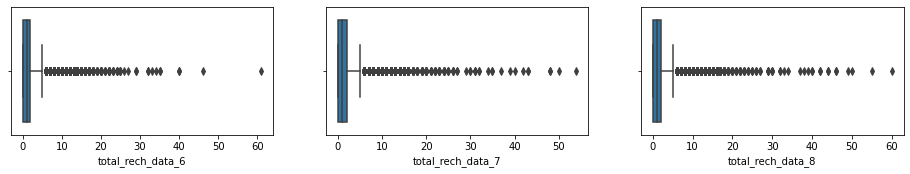

In [40]:
plt.figure(figsize=(16,8))

plt.subplot(3, 3, 1)
#subplot 1
sns.boxplot(high_value_cust['total_rech_data_6'])

plt.subplot(3, 3, 2)
#subplot 2
sns.boxplot(high_value_cust['total_rech_data_7'])

plt.subplot(3, 3, 3)
#subplot 3
sns.boxplot(high_value_cust['total_rech_data_8'])

### Total recharge data for augsut month has increased as comapred to june month which is a good sign

<AxesSubplot:xlabel='total_month_rech_8'>

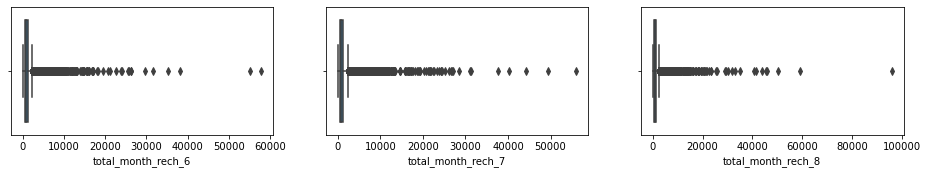

In [41]:
plt.figure(figsize=(16,8))

plt.subplot(3, 3, 1)
#subplot 1
sns.boxplot(high_value_cust['total_month_rech_6'])

plt.subplot(3, 3, 2)
#subplot 2
sns.boxplot(high_value_cust['total_month_rech_7'])

plt.subplot(3, 3, 3)
#subplot 3
sns.boxplot(high_value_cust['total_month_rech_8'])

### Total recharge for augsut month has increased as comapred to june month which is a good sign

<AxesSubplot:xlabel='total_rech_amt_8'>

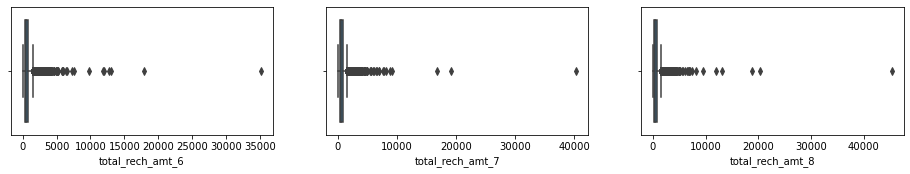

In [42]:
plt.figure(figsize=(16,8))

plt.subplot(3, 3, 1)
#subplot 1
sns.boxplot(high_value_cust['total_rech_amt_6'])

plt.subplot(3, 3, 2)
#subplot 2
sns.boxplot(high_value_cust['total_rech_amt_7'])

plt.subplot(3, 3, 3)
#subplot 3
sns.boxplot(high_value_cust['total_rech_amt_8'])

### Total recharge amount has decreased for august month as compared to good phase months

<AxesSubplot:xlabel='Churn_cusomters_Flag Y/N', ylabel='vol_3g_mb_8'>

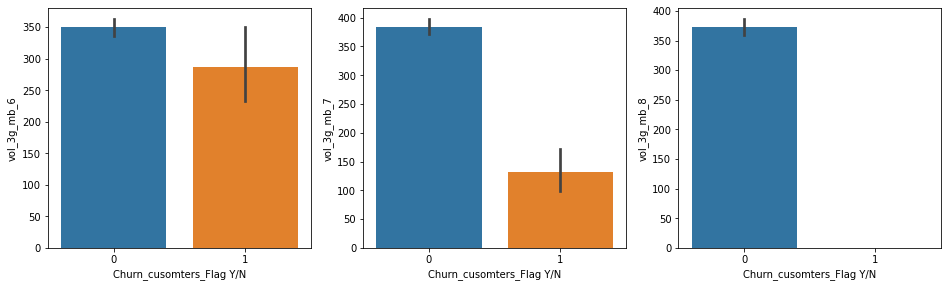

In [43]:
plt.figure(figsize=(16,15))

plt.subplot(3, 3, 1)
#subplot 1
sns.barplot(x=high_value_cust['Churn_cusomters_Flag Y/N'],y=high_value_cust['vol_3g_mb_6'])

plt.subplot(3, 3, 2)
#subplot 2
sns.barplot(x=high_value_cust['Churn_cusomters_Flag Y/N'],y=high_value_cust['vol_3g_mb_7'])

plt.subplot(3, 3, 3)
#subplot 3
sns.barplot(x=high_value_cust['Churn_cusomters_Flag Y/N'],y=high_value_cust['vol_3g_mb_8'])

### Customers who have churned out have their data usage decreasing over the months

<AxesSubplot:xlabel='Churn_cusomters_Flag Y/N', ylabel='std_og_mou_8'>

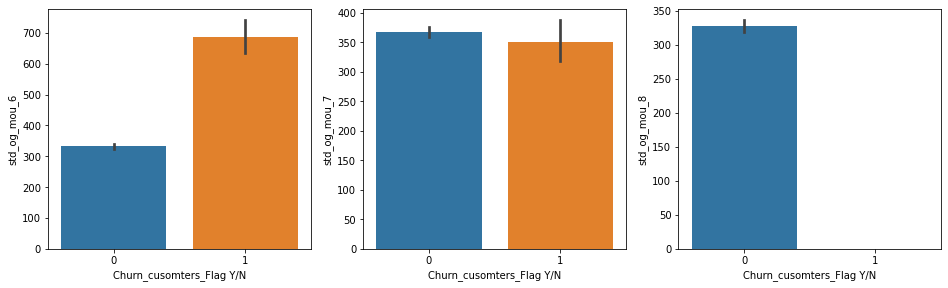

In [44]:
plt.figure(figsize=(16,15))

plt.subplot(3, 3, 1)
#subplot 1
sns.barplot(x=high_value_cust['Churn_cusomters_Flag Y/N'],y=high_value_cust['std_og_mou_6'])

plt.subplot(3, 3, 2)
#subplot 2
sns.barplot(x=high_value_cust['Churn_cusomters_Flag Y/N'],y=high_value_cust['std_og_mou_7'])

plt.subplot(3, 3, 3)
#subplot 3
sns.barplot(x=high_value_cust['Churn_cusomters_Flag Y/N'],y=high_value_cust['std_og_mou_8'])

### Customers who have churned out have their outgoing  std calls decreasing over the months

<AxesSubplot:xlabel='Churn_cusomters_Flag Y/N', ylabel='total_ic_mou_8'>

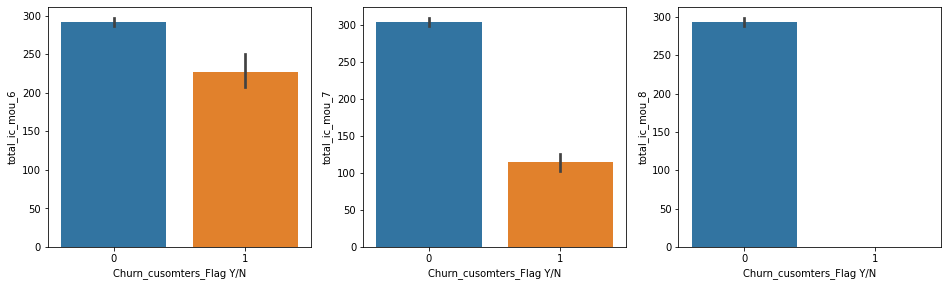

In [45]:
plt.figure(figsize=(16,15))

plt.subplot(3, 3, 1)
#subplot 1
sns.barplot(x=high_value_cust['Churn_cusomters_Flag Y/N'],y=high_value_cust['total_ic_mou_6'])

plt.subplot(3, 3, 2)
#subplot 2
sns.barplot(x=high_value_cust['Churn_cusomters_Flag Y/N'],y=high_value_cust['total_ic_mou_7'])

plt.subplot(3, 3, 3)
#subplot 3
sns.barplot(x=high_value_cust['Churn_cusomters_Flag Y/N'],y=high_value_cust['total_ic_mou_8'])

### Customers who ahve churned out have their incoming calls decreased over the months

<AxesSubplot:xlabel='Churn_cusomters_Flag Y/N', ylabel='total_og_mou_8'>

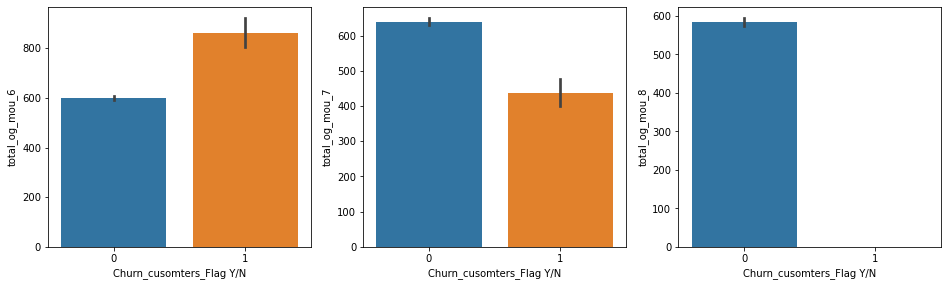

In [46]:
plt.figure(figsize=(16,15))

plt.subplot(3, 3, 1)
#subplot 1
sns.barplot(x=high_value_cust['Churn_cusomters_Flag Y/N'],y=high_value_cust['total_og_mou_6'])

plt.subplot(3, 3, 2)
#subplot 2
sns.barplot(x=high_value_cust['Churn_cusomters_Flag Y/N'],y=high_value_cust['total_og_mou_7'])

plt.subplot(3, 3, 3)
#subplot 3
sns.barplot(x=high_value_cust['Churn_cusomters_Flag Y/N'],y=high_value_cust['total_og_mou_8'])

### Customers who ahve churned out have their outgoing calls decreased over the months

<AxesSubplot:xlabel='Churn_cusomters_Flag Y/N', ylabel='total_rech_amt_8'>

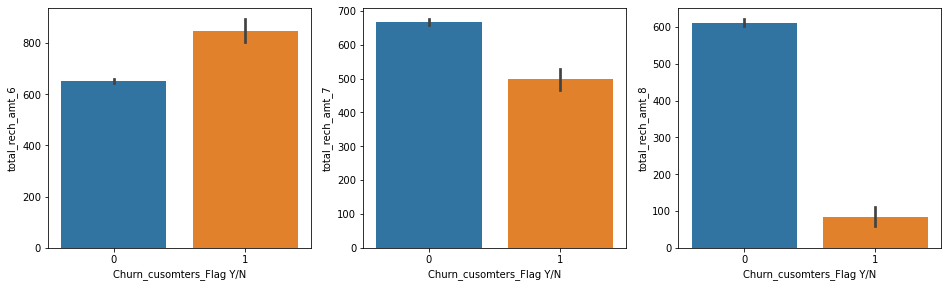

In [47]:
plt.figure(figsize=(16,15))

plt.subplot(3, 3, 1)
#subplot 1
sns.barplot(x=high_value_cust['Churn_cusomters_Flag Y/N'],y=high_value_cust['total_rech_amt_6'])

plt.subplot(3, 3, 2)
#subplot 2
sns.barplot(x=high_value_cust['Churn_cusomters_Flag Y/N'],y=high_value_cust['total_rech_amt_7'])

plt.subplot(3, 3, 3)
#subplot 3
sns.barplot(x=high_value_cust['Churn_cusomters_Flag Y/N'],y=high_value_cust['total_rech_amt_8'])

### Customers who have churned out have their total recharges decreased over the months

# PCA

In [48]:
# removing the date_time columns form the dataset

high_value_cust = high_value_cust.drop('last_date_of_month_6',axis=1)
high_value_cust = high_value_cust.drop('last_date_of_month_7',axis=1)
high_value_cust = high_value_cust.drop('last_date_of_month_8',axis=1)
high_value_cust = high_value_cust.drop('date_of_last_rech_6',axis=1)
high_value_cust = high_value_cust.drop('date_of_last_rech_7',axis=1)
high_value_cust = high_value_cust.drop('date_of_last_rech_8',axis=1)

## Train-Test Split

In [49]:
X = high_value_cust.drop(['Churn_cusomters_Flag Y/N'], axis=1)
y = high_value_cust['Churn_cusomters_Flag Y/N']   
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)

## Performing scaling & PCA

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
# using smote for the removing class imbalance

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_train_smo, y_train_smo = sm.fit_resample(X_train, y_train)

In [52]:
pca = PCA(random_state=42)

In [53]:
pca.fit(X_train_smo)

PCA(random_state=42)

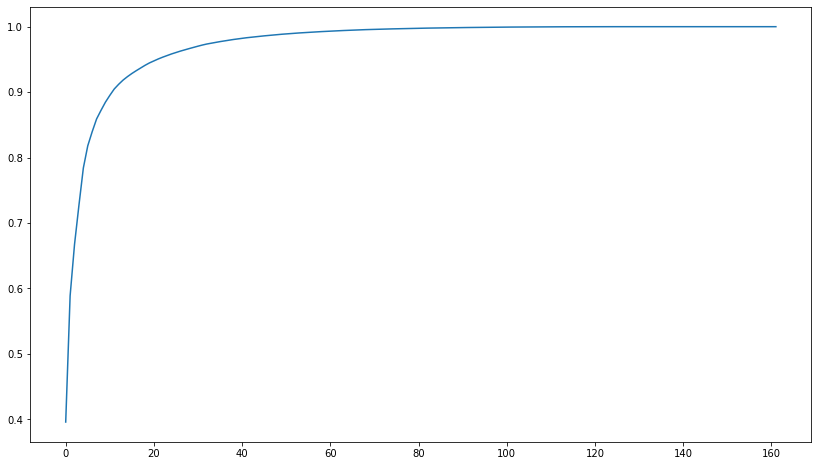

In [54]:
#lets draw screeplot in between cumulative variance and number of components

fig = plt.figure(figsize = (14,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

## Around 35 components are able to explain 95% variance

In [55]:
from sklearn.decomposition import IncrementalPCA
pca_incremental = IncrementalPCA(n_components=35)

In [56]:
X_train_pca_incremental = pca_incremental.fit_transform(X_train_smo)

In [57]:
X_test_pca_incremental = pca_incremental.transform(X_test)
X_test_pca_incremental.shape

(6300, 35)

# Model Logistic Regression

In [58]:
model_2 = LogisticRegression()
model_2.fit(X_train_pca_incremental,y_train_smo)

LogisticRegression()

In [59]:
# Predictions on the training set
logtrain_predictions = model_2.predict(X_train_pca_incremental)
logtrain_predprob = model_2.predict_proba(X_train_pca_incremental)[:,1]

In [60]:
from sklearn import metrics

In [61]:
# Confusion matrix 
pred_probs_test = model_2.predict(X_test_pca_incremental)
confusion = metrics.confusion_matrix(y_test, pred_probs_test)
print(confusion)

[[5696  271]
 [   4  329]]


In [62]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_test,pred_probs_test))
print((metrics.roc_auc_score(y_test, pred_probs_test)))
print((metrics.precision_score(y_test, pred_probs_test)))

0.9563492063492064
0.9712857654034125
0.5483333333333333


In [63]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [64]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.987987987987988

In [65]:
# Let us calculate specificity
TN / float(TN+FP)

0.954583542818837

In [66]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.045416457181163064


In [67]:
# positive predictive value 
print (TP / float(TP+FP))

0.5483333333333333


In [68]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9992982456140351


In [69]:
#lets check with probability cutoff 0.5

y_train_pred = model_2.predict_proba(X_train_pca_incremental)[:,1]
y_train_pred_final = pd.DataFrame({'Churned':y_train_smo, 'Churned_Prob':y_train_pred})
y_train_pred_final['Churned_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Churned_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churned,Churned_Prob,predicted
0,0,0.000007,0
1,0,0.000405,0
2,0,0.000040,0
3,0,0.000175,0
4,0,0.018822,0


In [70]:
# Defining ROC curve
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [71]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churned, y_train_pred_final.Churned_Prob, drop_intermediate = False )

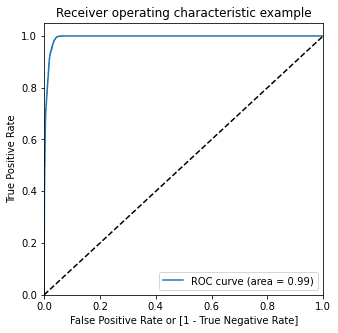

In [72]:
#lets draw roc curve

draw_roc(y_train_pred_final.Churned, y_train_pred_final.Churned_Prob)

In [73]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churned_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churned,Churned_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000007,0,1,0,0,0,0,0,0,0,0,0
1,0,0.000405,0,1,0,0,0,0,0,0,0,0,0
2,0,0.000040,0,1,0,0,0,0,0,0,0,0,0
3,0,0.000175,0,1,0,0,0,0,0,0,0,0,0
4,0,0.018822,0,1,0,0,0,0,0,0,0,0,0


In [74]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.934629  1.000000  0.869259
0.2   0.2  0.951017  1.000000  0.902034
0.3   0.3  0.960576  1.000000  0.921153
0.4   0.4  0.967836  0.999856  0.935815
0.5   0.5  0.973334  0.998275  0.948394
0.6   0.6  0.975023  0.991375  0.958672
0.7   0.7  0.968303  0.967081  0.969525
0.8   0.8  0.948573  0.916265  0.980881
0.9   0.9  0.891504  0.793790  0.989219


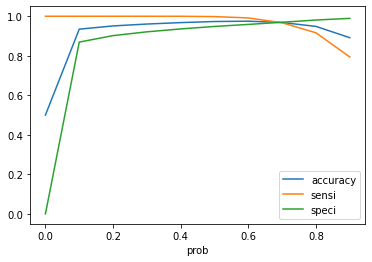

In [75]:
#lets plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

## From the curve it shows 0.65 as the optimal cut off

In [76]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churned_Prob.map( lambda x: 1 if x > 0.65 else 0)

y_train_pred_final.head()

,Churned,Churned_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.000007,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.000405,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.000040,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.000175,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.018822,0,1,0,0,0,0,0,0,0,0,0,0


In [77]:
#lets predict on train dataset with optimal cutoff probability
y_train_pred = model_2.predict_proba(X_train_pca_incremental)[:,1]
y_train_pred_final = pd.DataFrame({'Churned':y_train_smo, 'Churned_Prob':y_train_pred})
y_train_pred_final['Churned_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Churned_Prob.map(lambda x: 1 if x > 0.65 else 0)
y_train_pred_final.head()

,Churned,Churned_Prob,predicted
0,0,0.000007,0
1,0,0.000405,0
2,0,0.000040,0
3,0,0.000175,0
4,0,0.018822,0


In [78]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final.predicted)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print('precision score:',(metrics.precision_score(y_train_pred_final.Churned, y_train_pred_final.predicted)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))

precision score: 0.9646710387137719
Sensitivity/Recall : 0.983253072665852
Specificity: 0.9639905124703515


In [79]:
#lets predict on test datset with optimal cutoff obtained earlier
y_test_pred = model_2.predict_proba(X_test_pca_incremental)[:,1]
y_test_pred_final = pd.DataFrame({'Churned':y_test, 'Churned_Prob':y_test_pred})
y_test_pred_final['Churned_Prob'] = y_test_pred
y_test_pred_final['predicted'] = y_test_pred_final.Churned_Prob.map(lambda x: 1 if x > 0.65 else 0)
y_test_pred_final.head()

,Churned,Churned_Prob,predicted
12959,0,0.000741,0
36879,0,0.000811,0
40807,0,0.001903,0
57070,1,0.989212,1
53303,0,0.053464,0


In [80]:
confusion = metrics.confusion_matrix(y_test_pred_final.Churned, y_test_pred_final.predicted)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print('precision score:',(metrics.precision_score(y_test_pred_final.Churned, y_test_pred_final.predicted)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))

precision score: 0.6320939334637965
Sensitivity/Recall : 0.96996996996997
Specificity: 0.9684933802580862


# Random forest

In [81]:
# GridSearchCV to find optimal n_estimators

from sklearn.model_selection import KFold


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(10, 30, 5)}

# instantiate the model
rf = RandomForestClassifier()

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train_pca_incremental, y_train_smo)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(10, 30, 5)},
             return_train_score=True, scoring='accuracy')

In [82]:
# scores of GridSearch CV

scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.254542,0.028364,0.034253,0.000638,10,{'max_depth': 10},0.979339,0.978616,0.976640,0.975741,0.977358,0.977539,0.001302,4,0.983199,0.983738,0.984457,0.984457,0.983604,0.983891,0.000495
1,6.644775,0.154470,0.040163,0.000611,15,{'max_depth': 15},0.984908,0.983648,0.983109,0.979874,0.982390,0.982786,0.001673,3,0.991375,0.991690,0.992229,0.991375,0.992273,0.991788,0.000395
2,7.321962,0.074845,0.043876,0.000470,20,{'max_depth': 20},0.985807,0.985445,0.983468,0.983288,0.982749,0.984151,0.001232,2,0.995553,0.994924,0.995912,0.995643,0.996272,0.995661,0.000445
3,7.909926,0.104225,0.047302,0.000456,25,{'max_depth': 25},0.986885,0.987421,0.985265,0.983648,0.984726,0.985589,0.001390,1,0.998697,0.998742,0.998922,0.998338,0.999236,0.998787,0.000294


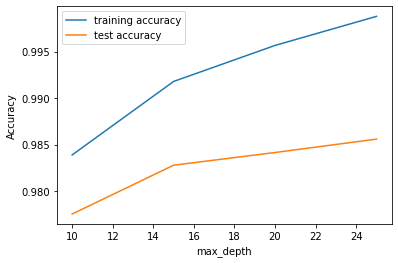

In [83]:
# plotting accuracies with max_depth

plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Max depth 20 

In [84]:
# tuning n_estimators

# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(50, 150, 25)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=20)

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_pca_incremental, y_train_smo)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=20),
             param_grid={'n_estimators': range(50, 150, 25)},
             return_train_score=True, scoring='accuracy')

In [85]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.718479,0.025757,0.022368,0.000336,50,{'n_estimators': 50},0.986166,0.986523,0.984187,0.982929,0.983109,0.984583,0.001506,3,0.995373,0.995014,0.995777,0.995508,0.996406,0.995616,0.000466
1,5.586286,0.026480,0.033405,0.000246,75,{'n_estimators': 75},0.986525,0.986164,0.984726,0.982570,0.984546,0.984906,0.001402,1,0.995597,0.995328,0.995867,0.995643,0.995777,0.995643,0.000184
2,7.493465,0.014890,0.044262,0.000432,100,{'n_estimators': 100},0.985986,0.986343,0.983648,0.982570,0.983827,0.984475,0.001450,4,0.995553,0.995463,0.995822,0.995508,0.996182,0.995705,0.000269
3,9.327093,0.070154,0.055381,0.000294,125,{'n_estimators': 125},0.985807,0.986882,0.984367,0.983109,0.983648,0.984762,0.001394,2,0.995463,0.995463,0.995822,0.995508,0.996092,0.995670,0.000250


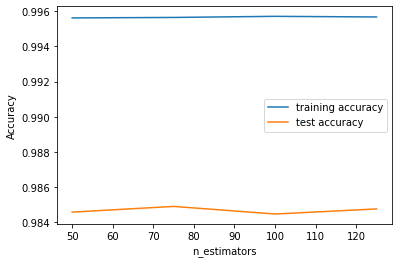

In [86]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### n_estimators = 100

In [87]:
# Tuning max features

# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=20,n_estimators=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_pca_incremental, y_train_smo)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=20),
             param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [88]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,6.129730,0.081946,0.046422,0.000777,4,{'max_features': 4},0.986166,0.986343,0.984187,0.982749,0.984367,0.984762,0.001342,2,0.995687,0.995732,0.995867,0.995732,0.996272,0.995858,0.000215
1,11.548511,0.070523,0.041663,0.000878,8,{'max_features': 8},0.985986,0.986164,0.984007,0.983648,0.984007,0.984762,0.001081,1,0.995553,0.994924,0.995732,0.995598,0.995598,0.995481,0.000285
2,20.309664,0.242514,0.040273,0.000669,14,{'max_features': 14},0.985447,0.985804,0.984546,0.982749,0.983109,0.984331,0.001221,3,0.994250,0.994654,0.995328,0.995059,0.995104,0.994879,0.000382
3,28.977655,0.287558,0.039410,0.001623,20,{'max_features': 20},0.984729,0.985624,0.983109,0.981491,0.983827,0.983756,0.001413,4,0.994295,0.994160,0.994789,0.994699,0.994834,0.994555,0.000275
4,34.390134,0.277442,0.037862,0.000681,24,{'max_features': 24},0.982752,0.984906,0.982749,0.981312,0.982929,0.982930,0.001148,5,0.994609,0.994115,0.994789,0.994520,0.994475,0.994502,0.000221


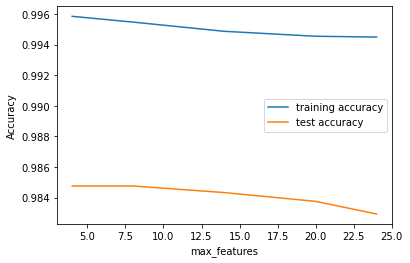

In [89]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Selecting max_features = 13

## Tuning min_samples_leaf

In [90]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(max_depth=20,n_estimators=100,max_features=13)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_pca_incremental, y_train_smo)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=20, max_features=13),
             param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy')

In [91]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,12.449516,0.057317,0.035935,0.000595,100,{'min_samples_leaf': 100},0.959037,0.959389,0.957412,0.956514,0.959389,0.958348,0.001173,1,0.962983,0.961817,0.961412,0.960559,0.959885,0.961331,0.001064
1,11.432715,0.142810,0.034809,0.000803,150,{'min_samples_leaf': 150},0.951491,0.954178,0.954358,0.952920,0.956873,0.953964,0.001782,2,0.956065,0.957594,0.957235,0.957235,0.956740,0.956974,0.000529
2,10.582926,0.107500,0.033769,0.000800,200,{'min_samples_leaf': 200},0.949874,0.952740,0.947350,0.948607,0.953279,0.950370,0.002305,3,0.953145,0.954584,0.952787,0.952742,0.952158,0.953083,0.000814
3,9.825505,0.098718,0.032397,0.000216,250,{'min_samples_leaf': 250},0.945562,0.949686,0.942318,0.942857,0.950404,0.946165,0.003361,4,0.949416,0.951799,0.948834,0.947846,0.950272,0.949633,0.001340
4,9.296527,0.028337,0.032464,0.001271,300,{'min_samples_leaf': 300},0.943766,0.944115,0.940162,0.941420,0.946271,0.943147,0.002144,5,0.947978,0.944477,0.944971,0.945510,0.945825,0.945752,0.001205


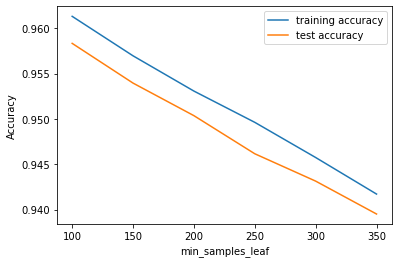

In [92]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### min_sampes_leaf 100

## tuning min_sample split

In [93]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold



# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(50, 300, 50)}

# instantiate the model
rf = RandomForestClassifier(max_depth=20,n_estimators=100,max_features=13,min_samples_leaf=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_pca_incremental, y_train_smo)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=20, max_features=13,
                                              min_samples_leaf=100),
             param_grid={'min_samples_split': range(50, 300, 50)},
             return_train_score=True, scoring='accuracy')

In [94]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,12.437384,0.067698,0.035450,0.000211,50,{'min_samples_split': 50},0.957420,0.961006,0.957951,0.957233,0.959569,0.958636,0.001443,1,0.961456,0.962535,0.961098,0.961278,0.961592,0.961592,0.000500
1,12.597546,0.165029,0.036049,0.000738,100,{'min_samples_split': 100},0.958857,0.959928,0.956334,0.955975,0.958850,0.957989,0.001552,4,0.961995,0.961457,0.961951,0.960649,0.962490,0.961708,0.000623
2,12.381066,0.063033,0.035527,0.000208,150,{'min_samples_split': 150},0.958498,0.958491,0.957412,0.955615,0.959928,0.957989,0.001431,3,0.963118,0.960379,0.962176,0.961188,0.962580,0.961888,0.000984
3,12.591758,0.214671,0.036265,0.000501,200,{'min_samples_split': 200},0.957959,0.958670,0.958131,0.956694,0.960467,0.958384,0.001227,2,0.962309,0.960694,0.962625,0.960828,0.961547,0.961601,0.000771
4,12.272990,0.081705,0.035377,0.000607,250,{'min_samples_split': 250},0.956162,0.957233,0.954717,0.954897,0.960647,0.956731,0.002160,5,0.961231,0.959975,0.960424,0.960155,0.960199,0.960397,0.000441


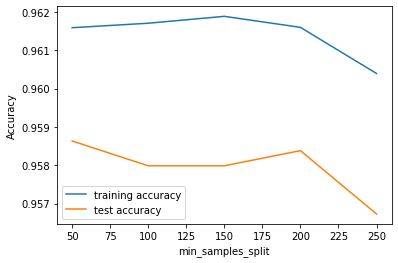

In [95]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### min samples split 100

## Fitting the final model with the best parameters obtained

In [96]:
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=20,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features=13,
                             n_estimators=100,
                             random_state=10)

In [97]:
# fit
rf_pca=rfc.fit(X_train_pca_incremental,y_train_smo)
#Predict on training set
rtrain_predictions = rf_pca.predict(X_train_pca_incremental)
rtrain_predprob = rf_pca.predict_proba(X_train_pca_incremental)[:,1]

In [98]:
print ("Accuracy :",metrics.roc_auc_score(y_train_smo, rtrain_predictions))
print ("Recall/Sensitivity :",metrics.recall_score(y_train_smo, rtrain_predictions))
print ("AUC Score (Train):",metrics.roc_auc_score(y_train_smo, rtrain_predprob))

Accuracy : 0.9651405160641126
Recall/Sensitivity : 0.980378063681449
AUC Score (Train): 0.9924390291014277


In [99]:
#lets predict on test dataset
pred_probs_test = rf_pca.predict(X_test_pca_incremental)
confusion = metrics.confusion_matrix(y_test, pred_probs_test)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",(metrics.roc_auc_score(y_test, pred_probs_test)))
print('precision score:',(metrics.precision_score(y_test, pred_probs_test)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print("Accuracy :",(metrics.accuracy_score(y_test,pred_probs_test)))

Roc_auc_score : 0.9445939151821505
precision score: 0.5380622837370242
Sensitivity/Recall : 0.933933933933934
Specificity: 0.9552538964303671
Accuracy : 0.9541269841269842


In [100]:
#lets check with probability cutoff 0.5
y_train_predrf = rf_pca.predict_proba(X_train_pca_incremental)[:,1]
y_train_predrf_final = pd.DataFrame({'Churned':y_train_smo, 'Churned_Prob':y_train_predrf})
y_train_predrf_final['Churned_Prob'] = y_train_predrf
y_train_predrf_final['predicted'] = y_train_predrf_final.Churned_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_predrf_final.head()

,Churned,Churned_Prob,predicted
0,0,0.031611,0
1,0,0.000731,0
2,0,0.014852,0
3,0,0.000414,0
4,0,0.006254,0


In [101]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_predrf_final[i]= y_train_predrf_final.Churned_Prob.map(lambda x: 1 if x > i else 0)
y_train_predrf_final.head()

,Churned,Churned_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.031611,0,1,0,0,0,0,0,0,0,0,0
1,0,0.000731,0,1,0,0,0,0,0,0,0,0,0
2,0,0.014852,0,1,0,0,0,0,0,0,0,0,0
3,0,0.000414,0,1,0,0,0,0,0,0,0,0,0
4,0,0.006254,0,1,0,0,0,0,0,0,0,0,0


In [102]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_predrf_final.Churned, y_train_predrf_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.562352  1.000000  0.124704
0.1   0.1  0.884353  1.000000  0.768706
0.2   0.2  0.928808  0.999856  0.857759
0.3   0.3  0.951376  0.998419  0.904334
0.4   0.4  0.960900  0.992309  0.929490
0.5   0.5  0.965141  0.980378  0.949903
0.6   0.6  0.960109  0.957019  0.963200
0.7   0.7  0.940487  0.909150  0.971825
0.8   0.8  0.911737  0.841515  0.981959
0.9   0.9  0.864228  0.735715  0.992741


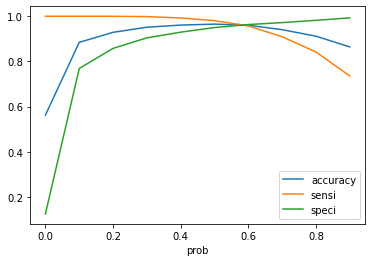

In [103]:
#lets plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Optimal cutoff can be taken 0.55

In [104]:
#apply cutoff probability
y_train_predrf_final['final_predicted'] = y_train_predrf_final.Churned_Prob.map( lambda x: 1 if x > 0.55 else 0)
#lets predict on train dataset with optimal cutoff probability
y_train_predrf = rf_pca.predict_proba(X_train_pca_incremental)[:,1]
y_train_predrf_final = pd.DataFrame({'Churned':y_train_smo, 'Churned_Prob':y_train_predrf})
y_train_predrf_final['Churned_Prob'] = y_train_predrf
y_train_predrf_final['predicted'] = y_train_predrf_final.Churned_Prob.map(lambda x: 1 if x > 0.55 else 0)
y_train_predrf_final.head()

,Churned,Churned_Prob,predicted
0,0,0.031611,0
1,0,0.000731,0
2,0,0.014852,0
3,0,0.000414,0
4,0,0.006254,0


In [105]:
#lets find out all scores of train dataset
confusion = metrics.confusion_matrix(y_train_predrf_final.Churned, y_train_predrf_final.predicted)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",(metrics.roc_auc_score(y_train_predrf_final.Churned, y_train_predrf_final.predicted)))
print('precision score:',(metrics.precision_score(y_train_predrf_final.Churned, y_train_predrf_final.predicted)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))

Roc_auc_score : 0.9642061381441818
precision score: 0.9575628763726532
Sensitivity/Recall : 0.9714655358297994
Specificity: 0.956946740458564
False Positive Rate: 0.043053259541436066
Positive predictive value: 0.9575628763726532
Negative Predictive value: 0.9710451462329517


In [106]:
#lets predict on test datset with optimal cutoff obtained earlier
y_test_predrf = rf_pca.predict_proba(X_test_pca_incremental)[:,1]
y_test_predrf_final = pd.DataFrame({'Churned':y_test, 'Churned_Prob':y_test_predrf})
y_test_predrf_final['Churned_Prob'] = y_test_predrf
y_test_predrf_final['predicted'] = y_test_predrf_final.Churned_Prob.map(lambda x: 1 if x > 0.55 else 0)
y_test_predrf_final.head()

,Churned,Churned_Prob,predicted
12959,0,0.000000,0
36879,0,0.008126,0
40807,0,0.253531,0
57070,1,0.992903,1
53303,0,0.027663,0


In [107]:
#lets find out all scores of test dataset
confusion = metrics.confusion_matrix(y_test_predrf_final.Churned, y_test_predrf_final.predicted)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",metrics.roc_auc_score(y_test_predrf_final.Churned, y_test_predrf_final.predicted))
print('precision score :',(metrics.precision_score(y_test_predrf_final.Churned, y_test_predrf_final.predicted)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))

Roc_auc_score : 0.9339294045176398
precision score : 0.5644859813084112
Sensitivity/Recall : 0.9069069069069069
Specificity: 0.9609519021283727
False Positive Rate: 0.03904809787162728
Positive predictive value: 0.5644859813084112
Negative Predictive value: 0.9946227233304423


### Train and test recall score of random forest

##### Train Sensitivity/Recall:0.9714655358297994
##### Test Sensitivity/Recall:0.9069069069069069

### Train and test recall score of Logistic regression

##### Train Sensitivity/Recall:0.983253072665852
##### Test Sensitivity/Recall:0.96996996996997

###  Recall difference between train and test data set is low for logistic regression hence we will consider the logistic regression model. We can consider the model in which recall is high as we don't want to miss any missclassification of high value customer

In [108]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=20,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features=13,
                             n_estimators=100)

In [109]:
# fit
rfc.fit(X_train_smo,y_train_smo)

RandomForestClassifier(max_depth=20, max_features=13, min_samples_leaf=100,
                       min_samples_split=100)

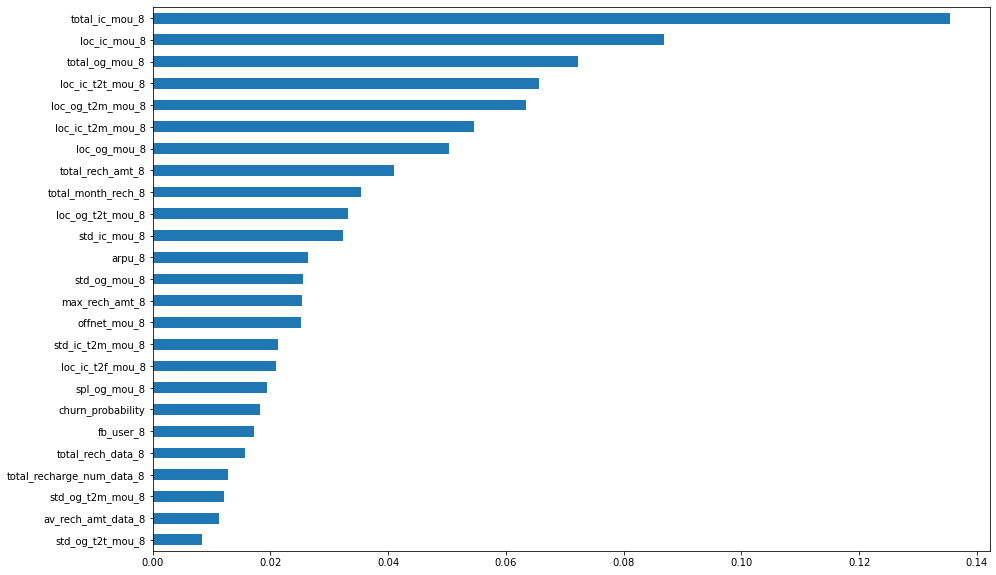

In [110]:
plt.figure(figsize=(15,10))
impo_features = pd.Series(rfc.feature_importances_, index=X.columns)
impo_features.nlargest((25)).sort_values().plot(kind='barh', align='center')
plt.show()

### We could see from above plot that almost all the features of top 25 most important features are from action phase that is August month. Hence we need to focus on these features to identify high value customers who may churn in future.

## Recommendations

1.) All the factors on which company should focus are mentioned above

2.) Company should focus on roaming charges - if roaming charge increase then customer is highly likely to churn as the other operator might be offering low price

3.) Company should focus on data recharge amount and good internet speed

4.) If customer incoming calls usage has increased and outgoing calls usage has decreased then company should take action as the customer might not be happy with the recharge amounts and will likely churn

5.) If all kinds of call and data usage reduces then it's a concern as customer may be planning to churn and just timepassing for few more days. so company need to look into these ares.


## Creating submission file

In [111]:
pipe3 = Pipeline(steps = [('scaling',scaler),('pca',pca_incremental),('model',model_2)])

In [112]:
sample.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [113]:
unseen.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [114]:
unseen.shape

(30000, 171)

In [115]:
# making the column names similar to other column name

unseen = unseen.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8'})

In [116]:
# Focusing on high value customers, imputing missing values with 0

unseen[['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','total_rech_data_6','total_rech_data_7','total_rech_data_8']]= data[['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','total_rech_data_6','total_rech_data_7','total_rech_data_8']].fillna(0, axis=1)

In [117]:
# imputing missing values for other columns

col1 = ['max_rech_data_6','max_rech_data_7','max_rech_data_8','count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8','night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']
unseen[col1]=unseen[col1].replace(np.nan, 0)

In [118]:
#sum all types of data recharge in the month

unseen['total_recharge_num_data_6'] = (unseen['count_rech_2g_6'] + unseen['count_rech_3g_6']).astype(int)
unseen['total_recharge_num_data_7'] = (unseen['count_rech_2g_7'] + unseen['count_rech_3g_7']).astype(int)
unseen['total_recharge_num_data_8'] = (unseen['count_rech_2g_8'] + unseen['count_rech_3g_8']).astype(int)

In [119]:
#calculating total amount spent on recharging data in different months

unseen['total_recharge_amt_data_6'] = unseen['total_recharge_num_data_6']*unseen['av_rech_amt_data_6']
unseen['total_recharge_amt_data_7'] = unseen['total_recharge_num_data_7']*unseen['av_rech_amt_data_7']
unseen['total_recharge_amt_data_8'] = unseen['total_recharge_num_data_8']*unseen['av_rech_amt_data_8']

In [120]:
# calculating the total amount of recharge mobile data + call

unseen['total_month_rech_6'] = unseen['total_rech_amt_6'] + unseen['total_recharge_amt_data_6']
unseen['total_month_rech_7'] = unseen['total_rech_amt_7'] + unseen['total_recharge_amt_data_7']
unseen['total_month_rech_8'] = unseen['total_rech_amt_8'] + unseen['total_recharge_amt_data_8']

In [121]:
unseen['churn_probability'] = '0'
unseen['churn_probability'] = unseen['churn_probability'].astype('int') 

In [122]:
## getting the important features which we  used in training the model

impo_features = pd.Series(rfc.feature_importances_, index=X.columns)

impo_features

id                           1.020353e-05
arpu_6                       1.284479e-05
arpu_7                       6.857925e-06
arpu_8                       2.644829e-02
onnet_mou_6                  1.684088e-04
onnet_mou_7                  9.170740e-06
onnet_mou_8                  1.308843e-03
offnet_mou_6                 1.756170e-04
offnet_mou_7                 6.501813e-04
offnet_mou_8                 2.523538e-02
roam_ic_mou_6                3.712969e-05
roam_ic_mou_7                3.753208e-03
roam_ic_mou_8                8.035149e-05
roam_og_mou_6                1.014767e-04
roam_og_mou_7                8.004277e-03
roam_og_mou_8                1.399998e-04
loc_og_t2t_mou_6             1.573743e-04
loc_og_t2t_mou_7             6.209226e-06
loc_og_t2t_mou_8             3.314979e-02
loc_og_t2m_mou_6             5.464997e-05
loc_og_t2m_mou_7             8.180571e-06
loc_og_t2m_mou_8             6.338480e-02
loc_og_t2f_mou_6             1.659026e-06
loc_og_t2f_mou_7             1.187

In [123]:
df2 = pd.DataFrame(data = impo_features)
df2.shape

(162, 1)

In [124]:
df2 = df2.reset_index()
df2.head()

,index,0
0,id,0.000010
1,arpu_6,0.000013
2,arpu_7,0.000007
3,arpu_8,0.026448
4,onnet_mou_6,0.000168


In [125]:
new_var4 = list(df2['index'])
new_var4

['id',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'l

In [126]:
#new_var1 = list(X.columns)
#new_var1

In [127]:
unseen1 = unseen.copy()
unseen1.shape

(30000, 181)

In [128]:
submission_data5 = pd.DataFrame(data=unseen1,columns = new_var4)
submission_data5.shape

(30000, 162)

In [129]:
submission_data5.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn_probability,total_recharge_num_data_6,total_recharge_num_data_7,total_recharge_num_data_8,total_recharge_amt_data_6,total_recharge_amt_data_7,total_recharge_amt_data_8,total_month_rech_6,total_month_rech_7,total_month_rech_8
0,69999,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,30,30,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1692,0.00,0.00,0.00,0,0,0,0,0.0,0.0,0.0,103.0,90.0,60.0
1,70000,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,250,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,145.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2533,0.00,0.00,0.00,0,0,0,0,0.0,0.0,0.0,500.0,500.0,500.0
2,70001,329.844,434.884,746.239,7.54,7.86,8.40,16.98,45.81,45.04,22.81,103.38,26.08,24.53,53.68,54.4

In [130]:
submission_data5 = submission_data5.replace(np.nan, 0)

In [131]:
#submission_data = scaler.fit_transform(submission_data)

In [132]:
unseen1['churn_probability_final'] = pipe3.predict(submission_data5)
output1 = unseen1[['id','churn_probability_final']]
output1.head()

,id,churn_probability_final
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [133]:
output1 = output1.rename(columns={'churn_probability_final':'churn_probability'})
output1.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [134]:
# checking the shape of the dataset

output1.shape

(30000, 2)

In [135]:
output1.to_csv('submission_pca_lr_Dec24.csv',index=False)

#  *******************************END***********************************